## LSPR response calculation

We study the relation between the LSPR response and the sensor-analyte distance. We vary the distance between the silver sphere (sensor) and the analytes (BSA protein) and we calculate the extinction cross section as a function of wavelength for the different distances:

* $d = \infty$ i.e. we only have the sensor (silver sphere r=25 nm)
* $d=4 \,nm$
* $d=2 \,nm$
* $d=1 \,nm$

In [1]:
import numpy
from matplotlib import pyplot, rcParams
#from scripts.data_analysis_helper import plot_cext_wave_distance
#%matplotlib notebook
%matplotlib inline

In [2]:
w , Cext = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/d1_tole-3/BSA_sensorR125_d=infty_total.txt', 
                               unpack = True)
w_d1 , Cext_d1 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/d1_tole-3/BSA_sensorR125_d=1_dens1_total.txt', 
                               unpack = True)
#w_d2 , Cext_d2 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/p=5/BSA_sensor_d=2_total.txt', 
#                               unpack = True)
#w_d4 , Cext_d4 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/p=5/BSA_sensor_d=4_total.txt', 
#                               unpack = True)

In [3]:
#wavelength = [w/10., w_d4/10, w_d2/10., w_d1/10.]
#cext = [Cext, Cext_d4, Cext_d2, Cext_d1]
#linestyles = ['-', '--', '-.', ':']
#colors = ['k', '0.2', '0.4', '0.6']
#labels = ['$d = \infty$','$d=4 \,nm$', '$d=2 \,nm$', '$d=1 \,nm$']

wavelength = [w/10., w_d1/10.]
cext = [Cext, Cext_d1]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

In [4]:
def plot_cext_wave_distance(wavelength, cext, linestyles, colors, labels, title=None):
    '''Plots the cross extinction section as a function of wavelength for
    different values of distance at which the proteins are located.

  	Arguments:
    ----------
    wavelength: list of wavelength arrays for each distance case.
    cext      : list of cross extinction section arrays for each distance case.
    linestyles: list of linstyles we desire to use for each distance case.
    colors    : list of colors we desire to use for each distance case.
    labels    : list of labels we desire to use for each distance case.
	'''
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 16
    rcParams['xtick.top'] = True
    rcParams['ytick.right'] = True
    rcParams['axes.linewidth'] = 2

    fig=pyplot.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)
    
    major_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 11)
    minor_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 21)
    #major_yticks = numpy.linspace(0, 8000, 9)
    #minor_yticks = numpy.linspace(0, 8000, 33)

    ax.set_xticks(major_xticks)                                                       
    ax.set_xticks(minor_xticks, minor=True)
    #ax.set_yticks(major_yticks)                                                       
    #ax.set_yticks(minor_yticks, minor=True)

    pyplot.xticks(rotation=25)
    pyplot.tick_params(axis='both', length=5, width=1, which='major', direction='in')
    pyplot.tick_params(axis='both', length=2.5, width=1, which='minor', direction='in')

    pyplot.xlabel('Wavelength [nm]')
    pyplot.ylabel('Cross extinction section [$nm^2$]')
    pyplot.xlim(382,387)
    #pyplot.ylim(0,8000)
    pyplot.grid(ls=':', which='minor', alpha=0.6)
    pyplot.grid(ls=':', which='major', alpha=0.8)
    #pyplot.title('Silver sphere with BSA Proteins')
    
    for i in range(len(wavelength)):
        pyplot.plot(wavelength[i], cext[i], linestyle=linestyles[i], 
                   color=colors[i], linewidth=2, label=labels[i])
    
    pyplot.legend(loc='best')

    if title:
        fig.tight_layout()
        pyplot.savefig('figures/'+title+'.pdf', dpi=80, format='pdf')



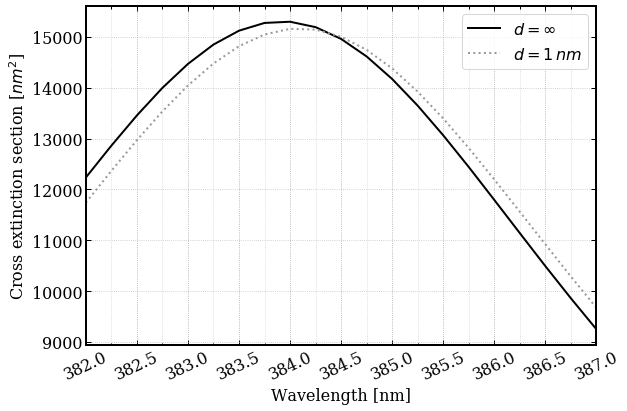

In [5]:
plot_cext_wave_distance(wavelength, cext, linestyles, colors, labels, title='1p_0rot_0tilt_ef-1')

In [6]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w[idx][0]))

Cext max at d=infty is 15296.97948969 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15157.01242337 and it occurs at a wavelngth of 3840.0


# Case d=1nm at z and 0, 0 in x,y . Prot rot 60 deg, tilt 30 deg, EF -1

In [7]:
w_6030 , Cext_6030 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030/BSA_sensorR125_d=infty_6030.txt', 
                               unpack = True)
w_d1_6030 , Cext_d1_6030 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030/BSA_sensorR125_d=1_6030.txt', 
                               unpack = True)

In [8]:
wavelength_6030 = [w_6030/10., w_d1_6030/10.]
cext_6030 = [Cext_6030, Cext_d1_6030]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

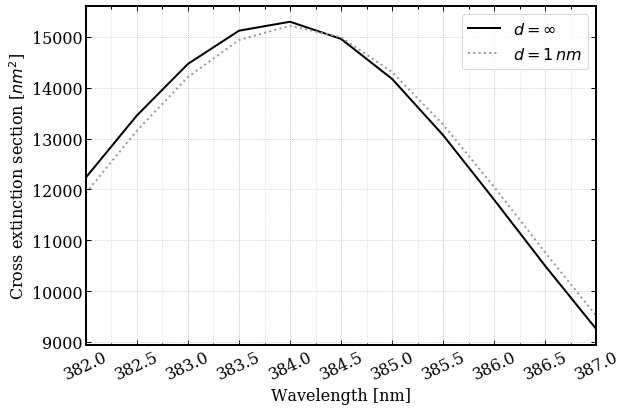

In [9]:
plot_cext_wave_distance(wavelength_6030, cext_6030, linestyles, colors, labels, title='1p_60rot_30tilt_ef-1')

In [10]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_6030, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_6030[idx][0]))

Cext max at d=infty is 15296.97948969 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15217.52713154 and it occurs at a wavelngth of 3840.0


# Case d=1nm at z and 0, 0 in x,y . Prot rot 60 deg, tilt 30 deg, EF -0.0037

In [11]:
w_ef , Cext_ef = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037/BSA_sensorR125_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_ef , Cext_d1_ef = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037/BSA_sensorR125_d=1_6030_ef0.0037_total.txt', 
                               unpack = True)



In [12]:
wavelength_ef = [w_ef/10., w_d1_ef/10.]
cext_ef = [Cext_ef, Cext_d1_ef]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

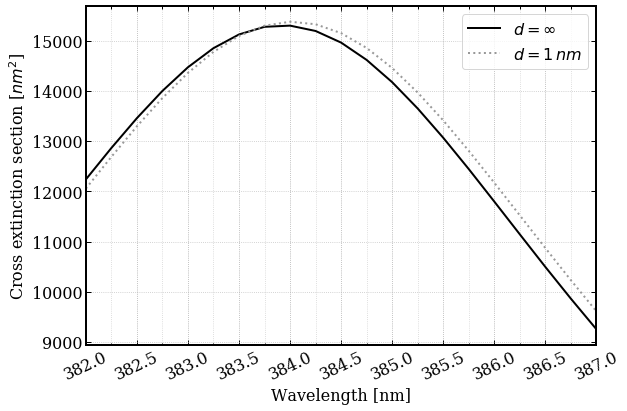

In [13]:
plot_cext_wave_distance(wavelength_ef, cext_ef, linestyles, colors, labels, title='1p_60rot_30tilt_ef-0.0037')

In [14]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_ef, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_ef[idx][0]))

Cext max at d=infty is 15296.97948625 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15374.58631287 and it occurs at a wavelngth of 3840.0


# Case d=1nm at z and 0, 0 in x,y and +/- 45 deg rot along y . Prot rot 60 deg, tilt 30 deg, EF -0.0037, 3 proteins

In [15]:
w_3p , Cext_3p = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_3p/BSA_sensorR125_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_3p , Cext_d1_3p = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_3p/BSA_sensorR125_3prot_d=1_ef0.0037_total.txt', 
                               unpack = True)

In [16]:
wavelength_3p = [w_3p/10., w_d1_3p/10.]
cext_3p = [Cext_3p, Cext_d1_3p]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

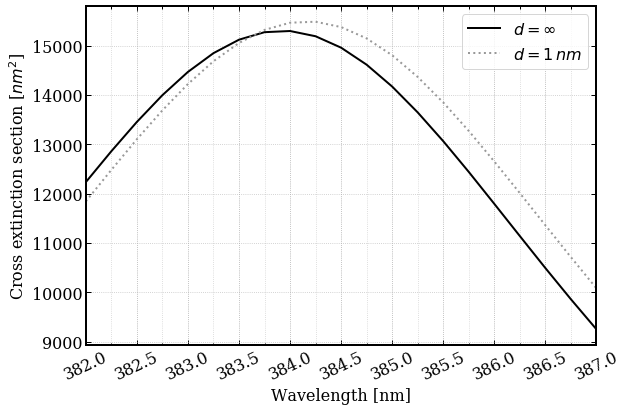

In [17]:
plot_cext_wave_distance(wavelength_3p, cext_3p, linestyles, colors, labels, title='3p_60rot_30tilt_ef-0.0037')

In [18]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_3p, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_3p[idx][0]))

Cext max at d=infty is 15296.97948625 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15484.98418821 and it occurs at a wavelngth of 3842.5


# Case d=1nm at z and 0, 0 in  EF -0.0037, 2 proteins +/- z orient 6030

In [19]:
w_2p , Cext_2p = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_2pz/BSA_sensorR125_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_2p , Cext_d1_2p = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_2pz/BSA_sensorR125_2pz_d=1_ef0.0037_total.txt', 
                               unpack = True)

In [20]:
wavelength_2p = [w_2p/10., w_d1_2p/10.]
cext_2p = [Cext_2p, Cext_d1_2p]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

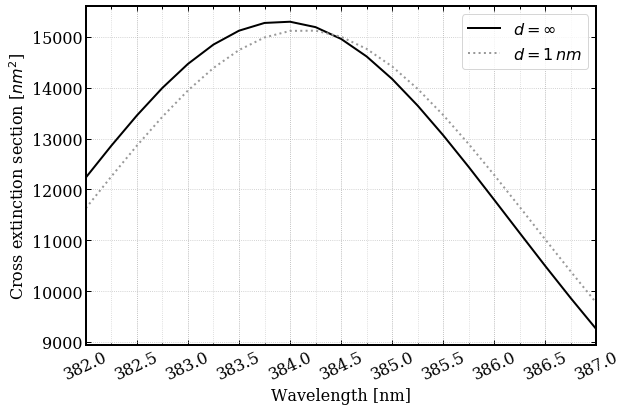

In [21]:
plot_cext_wave_distance(wavelength_2p, cext_2p, linestyles, colors, labels, title='2pz_ef-0.0037')

In [22]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_2p, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_2p[idx][0]))

Cext max at d=infty is 15296.97948625 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15121.67133896 and it occurs at a wavelngth of 3842.5


# Case d=1nm at z and 0, 0 in  EF -0.0037, 2 proteins +/- z orient 00

In [23]:
w_2p_00 , Cext_2p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_2pz_00/BSA_sensorR125_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_2p_00 , Cext_d1_2p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_2pz_00/BSA_sensorR125_2pz_d=1_00_ef0.0037_total.txt', 
                               unpack = True)

In [24]:
wavelength_2p_00 = [w_2p_00/10., w_d1_2p_00/10.]
cext_2p_00 = [Cext_2p_00, Cext_d1_2p_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

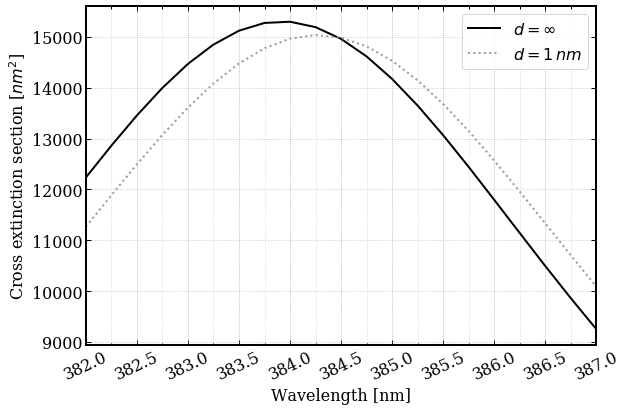

In [25]:
plot_cext_wave_distance(wavelength_2p_00, cext_2p_00, linestyles, colors, labels, title='2pz00_ef-0.0037')

In [26]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_2p_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_2p_00[idx][0]))

Cext max at d=infty is 15296.97948625 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15035.01800421 and it occurs at a wavelngth of 3842.5


# Case d=1nm at z, +/- 45 in  EF -0.0037, 3 proteins

In [27]:
w_3p_00 , Cext_3p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_3prot_d=1_00_ef0.0037/BSA_sensorR125_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_3p_00 , Cext_d1_3p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_3prot_d=1_00_ef0.0037/BSA_sensorR125_3prot_d=1_00_ef0.0037_total.txt', 
                               unpack = True)

In [28]:
wavelength_3p_00 = [w_3p_00/10., w_d1_3p_00/10.]
cext_3p_00 = [Cext_3p_00, Cext_d1_3p_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

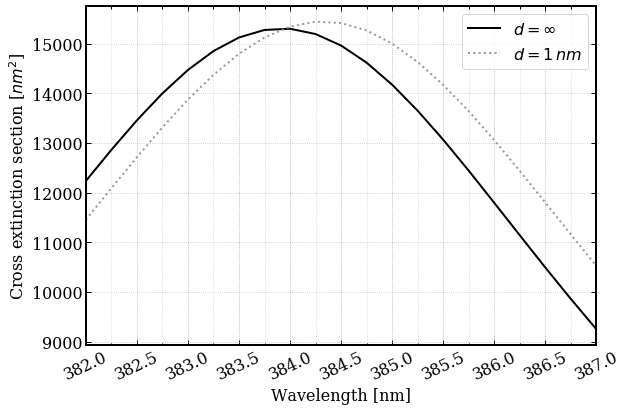

In [29]:
plot_cext_wave_distance(wavelength_3p_00, cext_3p_00, linestyles, colors, labels, title='3p00_ef-0.0037')

In [30]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_3p_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_3p_00[idx][0]))

Cext max at d=infty is 15296.97948625 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 15438.13143417 and it occurs at a wavelngth of 3842.5


# Case d=1nm at +/-z  and +/- y in  EF -0.0037, 4 proteins

In [31]:
w_4p_00 , Cext_4p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_4p/BSA_sensorR125_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_4p_00 , Cext_d1_4p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR125_d=1_6030_ef0.0037_4p/BSA_sensorR125_4prot_d=1_00_ef0.0037_total.txt', 
                               unpack = True)

In [32]:
wavelength_4p_00 = [w_4p_00/10., w_d1_4p_00/10.]
cext_4p_00 = [Cext_4p_00, Cext_d1_4p_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

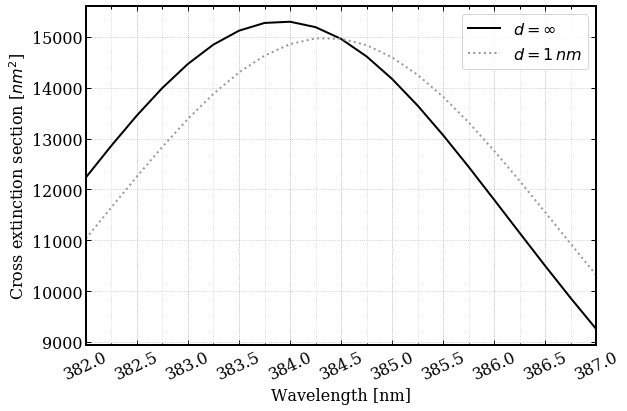

In [33]:
plot_cext_wave_distance(wavelength_4p_00, cext_4p_00, linestyles, colors, labels, title='4p00_ef-0.0037')

In [34]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_4p_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_4p_00[idx][0]))

Cext max at d=infty is 15296.97948625 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 14970.45420177 and it occurs at a wavelngth of 3842.5


# Case d=1nm at +/-z   in  EF -0.0037, 2 proteins R10 nm

In [35]:
w_2p10_00 , Cext_2p10_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR100_2p_ef0.0037/BSA_sensorR100_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_2p10_00 , Cext_d1_2p10_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR100_2p_ef0.0037/BSA_sensorR100_2prot_ef0.0037_total.txt', 
                               unpack = True)

In [36]:
wavelength_2p10_00 = [w_2p10_00/10., w_d1_2p10_00/10.]
cext_2p10_00 = [Cext_2p10_00, Cext_d1_2p10_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

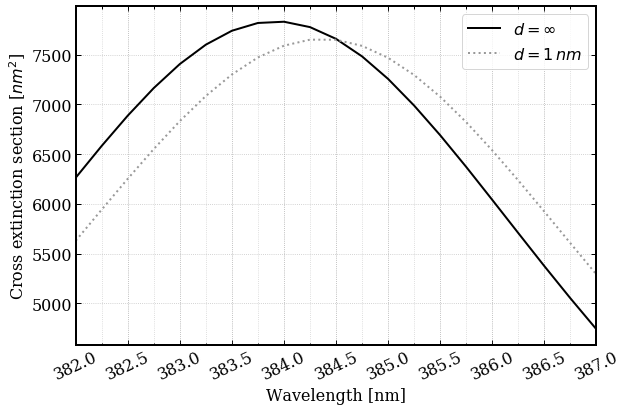

In [37]:
plot_cext_wave_distance(wavelength_2p10_00, cext_2p10_00, linestyles, colors, labels, title='2pr10_00_ef-0.0037')

In [38]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_2p10_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_2p10_00[idx][0]))

Cext max at d=infty is 7832.21649637 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 7651.83547235 and it occurs at a wavelngth of 3842.5


# Case d=1nm at +/-z and 1 at 30 deg on y (rotx)  in  EF -0.0037, 2 proteins R10 nm

In [39]:
w_3px_00 , Cext_3px_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR100_3p_ef0.0037/BSA_sensorR100_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_3px_00 , Cext_d1_3px_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR100_3p_ef0.0037/BSA_sensorR100_3prot_ef0.0037_total.txt', 
                               unpack = True)

In [40]:
wavelength_3px_00 = [w_3px_00/10., w_d1_3px_00/10.]
cext_3px_00 = [Cext_3px_00, Cext_d1_3px_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

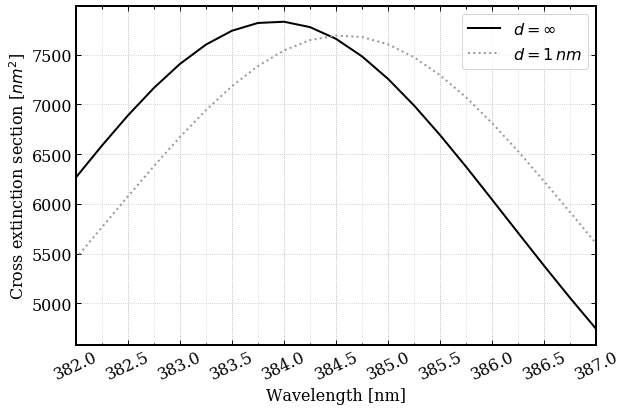

In [41]:
plot_cext_wave_distance(wavelength_3px_00, cext_3px_00, linestyles, colors, labels, title='3px_00_ef-0.0037')

In [42]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_3px_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_3px_00[idx][0]))

Cext max at d=infty is 7832.21649637 and it occurs at a wavelngth of 3840.0
Cext max at d=1 nm is 7692.92766466 and it occurs at a wavelngth of 3845.0


# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm

In [43]:
w_d1_00 , Cext_d1_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2pz/BSA_sensorR80_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d1_2p_00 , Cext_d1_2p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2pz/BSA_sensorR80_2pz_d=1_00_ef0.0037_total.txt', 
                               unpack = True)

In [44]:
wavelength_d1_2p_00 = [w_d1_00/10., w_d1_2p_00/10.]
cext_d1_00 = [Cext_d1_00, Cext_d1_2p_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=1 \,nm$']

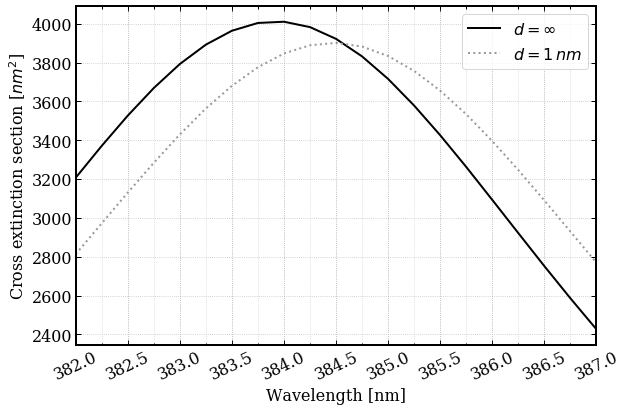

In [45]:
plot_cext_wave_distance(wavelength_d1_2p_00, cext_d1_00, linestyles, colors, labels, title='2pz_00_ef-0.0037_R8nm')

In [46]:
lab = ['d=infty', 'd=1 nm']
lst = list(zip(cext_d1_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelength of {}'.format(l,max(c), w_d1_00[idx][0]))

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3901.06202839 and it occurs at a wavelength of 3845.0


# Case d=0.5 nm at +/-z 2 proteins   EF -0.0037,  R8 nm

In [47]:
w_d05_00 , Cext_d05_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=0.5_2pz/BSA_sensorR80_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d05_2p_00 , Cext_d05_2p_00 = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=0.5_2pz/BSA_sensorR80_2pz_d=0.5_00_ef0.0037_total.txt', 
                               unpack = True)

In [48]:
wavelength_d05_2p_00 = [w_d05_00/10., w_d05_2p_00/10.]
cext_d05_00 = [Cext_d05_00, Cext_d05_2p_00]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=0.5 \,nm$']

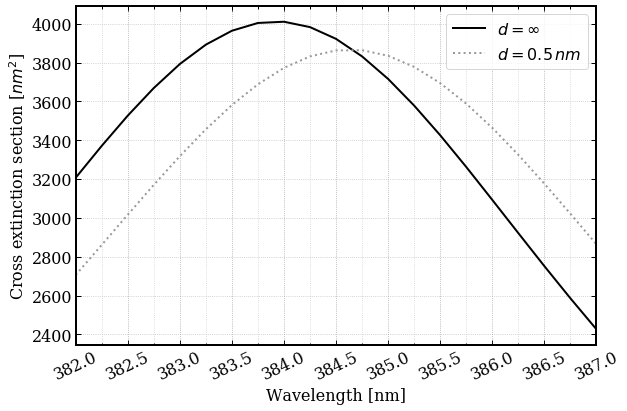

In [49]:
plot_cext_wave_distance(wavelength_d05_2p_00, cext_d05_00, linestyles, colors, labels, title='2pz_d05_00_ef-0.0037_R8nm')

In [50]:
lab = ['d=infty', 'd=0.5 nm']
lst = list(zip(cext_d05_00, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_d05_00[idx][0]))

Cext max at d=infty is 4010.09400027 and it occurs at a wavelngth of 3840.0
Cext max at d=0.5 nm is 3863.4502775 and it occurs at a wavelngth of 3847.5


# GOLD 

# Case d=0.5 nm at +/-z 2 proteins   EF -0.0037,  R8 nm

In [51]:
w_d05_00_g , Cext_d05_00_g = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=0.5_2pz_GOLD/GOLD_BSA_sensorR80_d=infty_ef0.0037_total.txt', 
                               unpack = True)
w_d05_2p_00_g , Cext_d05_2p_00_g = numpy.loadtxt('../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=0.5_2pz_GOLD/GOLD_BSA_sensorR80_2pz_d=0.5_00_ef0.0037_total.txt', 
                               unpack = True)

In [52]:
wavelength_d05_2p_00_g = [w_d05_00_g/10., w_d05_2p_00_g/10.]
cext_d05_00_g = [Cext_d05_00_g, Cext_d05_2p_00_g]
linestyles = ['-', ':']
colors = ['k', '0.6']
labels = ['$d = \infty$', '$d=0.5 \,nm$']

In [53]:
wavelength = wavelength_d05_2p_00_g
numpy.linspace(min(wavelength[0]), max(wavelength[0]), 11)

array([ 517.   ,  518.025,  519.05 ,  520.075,  521.1  ,  522.125,
        523.15 ,  524.175,  525.2  ,  526.225,  527.25 ])

In [54]:
def plot_cext_wave_distance(wavelength, cext, linestyles, colors, labels, title=None):
    '''Plots the cross extinction section as a function of wavelength for
    different values of distance at which the proteins are located.

  	Arguments:
    ----------
    wavelength: list of wavelength arrays for each distance case.
    cext      : list of cross extinction section arrays for each distance case.
    linestyles: list of linstyles we desire to use for each distance case.
    colors    : list of colors we desire to use for each distance case.
    labels    : list of labels we desire to use for each distance case.
	'''
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 16
    rcParams['xtick.top'] = True
    rcParams['ytick.right'] = True
    rcParams['axes.linewidth'] = 2

    fig=pyplot.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)
    
    major_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 11)
    #minor_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 21)
    #major_yticks = numpy.linspace(0, 8000, 9)
    #minor_yticks = numpy.linspace(0, 8000, 33)

    ax.set_xticks(major_xticks)                                                       
    #ax.set_xticks(minor_xticks, minor=True)
    #ax.set_yticks(major_yticks)                                                       
    #ax.set_yticks(minor_yticks, minor=True)

    pyplot.xticks(rotation=25)
    pyplot.tick_params(axis='both', length=5, width=1, which='major', direction='in')
    pyplot.tick_params(axis='both', length=2.5, width=1, which='minor', direction='in')

    pyplot.xlabel('Wavelength [nm]')
    pyplot.ylabel('Cross extinction section [$nm^2$]')
    pyplot.xlim(517,527)
    #pyplot.ylim(0,8000)
    pyplot.grid(ls=':', which='minor', alpha=0.6)
    pyplot.grid(ls=':', which='major', alpha=0.8)
    #pyplot.title('Silver sphere with BSA Proteins')
    
    for i in range(len(wavelength)):
        pyplot.plot(wavelength[i], cext[i], linestyle=linestyles[i], 
                   color=colors[i], linewidth=2, label=labels[i])
    
    pyplot.legend(loc='best')

    if title:
        pyplot.savefig('figures/'+title+'.pdf', dpi=80, format='pdf')



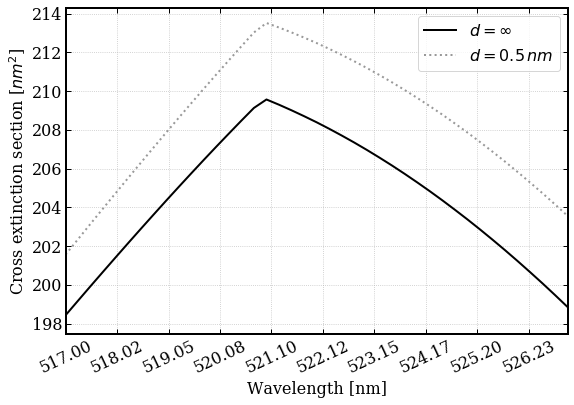

In [55]:
plot_cext_wave_distance(wavelength_d05_2p_00_g, cext_d05_00_g, linestyles, colors, labels, title='GOLD_2pz_d05_00_ef-0.0037_R8nm')

In [56]:
lab = ['d=infty', 'd=0.5 nm']
lst = list(zip(cext_d05_00_g, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_d05_00_g[idx][0]))

Cext max at d=infty is 209.57050904 and it occurs at a wavelngth of 5210.0
Cext max at d=0.5 nm is 213.51990511 and it occurs at a wavelngth of 5210.0
